<a href="https://colab.research.google.com/github/anand1994sp/AutoSAVE/blob/main/banglore_H_project2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Price Prediction

What are the things that a potential home buyer considers before purchasing a house? The location, the size of the property, vicinity to offices, schools, parks, restaurants, hospitals or the stereotypical white picket fence? What about the most important factor — the price?

Now with the lingering impact of demonetization, the enforcement of the Real Estate (Regulation and Development) Act (RERA), and the lack of trust in property developers in the city, housing units sold across India in 2017 dropped by 7 percent. In fact, the property prices in Bengaluru fell by almost 5 percent in the second half of 2017, said a study published by property consultancy Knight Frank.
For example, for a potential homeowner, over 9,000 apartment projects and flats for sale are available in the range of ₹42-52 lakh, followed by over 7,100 apartments that are in the ₹52-62 lakh budget segment, says a report by property website Makaan. According to the study, there are over 5,000 projects in the ₹15-25 lakh budget segment followed by those in the ₹34-43 lakh budget category.


Data Source: 
https://www.kaggle.com/amitabhajoy/bengaluru-house-price-data

# Importing Libraries and Loading Data

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib as mat
mat.rcParams["figure.figsize"]=(20,10)
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df= pd.read_csv("/content/drive/MyDrive/DS/DATASETS/Bengaluru_House_Dataset.csv")
df.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


price (target) is in Lakh unit

# Understanding the Dataset (EDA & Data Preprocessing)

In [7]:
df.shape

(13320, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [9]:
df.groupby("area_type")["area_type"].agg("count")

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [10]:
# df["area_type"].value_counts()

In [11]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

Let's drop columns that are not required for our model:
Society as large number of null values. 

In [12]:
df1 = df.drop(['society'], axis=1)
df1.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [13]:
df1.shape

(13320, 8)

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   total_sqft    13320 non-null  object 
 5   bath          13247 non-null  float64
 6   balcony       12711 non-null  float64
 7   price         13320 non-null  float64
dtypes: float64(3), object(5)
memory usage: 832.6+ KB


In [15]:
df1.isnull().sum()

area_type         0
availability      0
location          1
size             16
total_sqft        0
bath             73
balcony         609
price             0
dtype: int64

Large number of rows in balcony have null values. They can be filled with mode of balcony column.

In [16]:
df1['balcony'].fillna(df1['balcony'].mode()[0], inplace=True)

In [17]:
df1.isnull().sum()

area_type        0
availability     0
location         1
size            16
total_sqft       0
bath            73
balcony          0
price            0
dtype: int64

To avoid less accuracy droping 73 rows out of 13 thousands

In [18]:
 df1.dropna(axis=0,subset=["bath"],inplace=True)

In [19]:
df1.isnull().sum()

area_type       0
availability    0
location        1
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [20]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'total_sqft', 'bath',
       'balcony', 'price'],
      dtype='object')

In [21]:
df1["location"]=df1["location"].fillna(df1["location"].mode()[0])

In [22]:
df1.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [23]:
df1[df1.duplicated()].value_counts()

area_type             availability   location            size       total_sqft  bath  balcony  price 
Super built-up  Area  Ready To Move  Haralur Road        2 BHK      1243        2.0   2.0      46.00     15
                                     HSR Layout          2 BHK      1140        2.0   2.0      46.00      8
Plot  Area            Ready To Move  TC Palaya           3 Bedroom  1200        2.0   0.0      66.00      8
Super built-up  Area  Ready To Move  Parappana Agrahara  2 BHK      1194        2.0   2.0      47.00      6
Plot  Area            19-Jan         Anekal              2 Bedroom  1200        1.0   1.0      36.00      6
                                                                                                         ..
Super built-up  Area  Ready To Move  Banashankari        2 BHK      1020        2.0   2.0      40.79      1
                                     BEML Layout         2 BHK      1194        2.0   1.0      65.00      1
                                  

In [24]:
len(df1[df1.duplicated()])

569

In [25]:
df1.loc[(df1.location=="Haralur Road") & (df1.price==46.00)]

,area_type,availability,location,size,total_sqft,bath,balcony,price
1031,Super built-up Area,Ready To Move,Haralur Road,2 BHK,1194,2.0,2.0,46.0
1113,Super built-up Area,Ready To Move,Haralur Road,2 BHK,1243,2.0,1.0,46.0
1823,Super built-up Area,Ready To Move,Haralur Road,2 BHK,1194,2.0,2.0,46.0
2832,Super built-up Area,Ready To Move,Haralur Road,2 BHK,1243,2.0,2.0,46.0
3055,Super built-up Area,Ready To Move,Haralur Road,2 BHK,1243,2.0,2.0,46.0
4445,Super built-up Area,Ready To Move,Haralur Road,2 BHK,1194,2.0,2.0,46.0
5710,Super built-up Area,Ready To Move,Haralur Road,2 BHK,1243,2.0,2.0,46.0
5827,Super built-up Area,Ready To Move,Haralur Road,2 BHK,1243,2.0,2.0,46.0
6040,Super built-up Area,Ready To Move,Haralur Road,2 BHK,1243,2.0,2.0,46.0
6074,Super built-up Area,Ready To Move,Haralur Road,2 BHK,1243,2.0,2.0,46.0


Let's drop duplicate rows:

In [26]:
df1.drop(df1[df1.duplicated()].index, axis=0, inplace=True)

dropped 569 duplicate rows

In [27]:
df1.shape

(12678, 8)

In [28]:
len(df1[df1.duplicated()])

0

In [29]:
df1.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [30]:
df1.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


## Handling columns

In [31]:
for i in df1.columns:
   print(f"******{i}******")
   print("unique values: ", df1[i].unique())
   print("")

******area_type******
unique values:  ['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area']

******availability******
unique values:  ['19-Dec' 'Ready To Move' '18-May' '18-Feb' '18-Nov' '20-Dec' '17-Oct'
 '21-Dec' '19-Sep' '20-Sep' '18-Mar' '18-Apr' '20-Aug' '19-Mar' '17-Sep'
 '18-Dec' '17-Aug' '19-Apr' '18-Jun' '22-Dec' '22-Jan' '18-Aug' '19-Jan'
 '17-Jul' '18-Jul' '21-Jun' '20-May' '19-Aug' '18-Sep' '17-May' '17-Jun'
 '18-Oct' '21-May' '18-Jan' '20-Mar' '17-Dec' '16-Mar' '19-Jun' '22-Jun'
 '19-Jul' '21-Feb' '19-May' '17-Nov' '20-Oct' '20-Jun' '19-Feb' '21-Oct'
 '21-Jan' '17-Mar' '17-Apr' '22-May' '19-Oct' '21-Jul' '21-Nov' '21-Mar'
 '16-Dec' '22-Mar' '20-Jan' '21-Sep' '21-Aug' '14-Nov' '19-Nov' '15-Nov'
 '16-Jul' '15-Jun' '17-Feb' '20-Nov' '20-Jul' '16-Sep' '15-Oct' '20-Feb'
 '15-Dec' '16-Oct' '22-Nov' '15-Aug' '17-Jan' '16-Nov' '20-Apr' '16-Jan'
 '14-Jul']

******location******
unique values:  ['Electronic City Phase II' 'Chikka Tirupathi' 'Uttarahalli' ...
 '12th c

Availability doesn't seems to be an important feature. Thus, it can be dropped from original DataFrame.

In [32]:
df1 = df1.drop(["availability"], axis = 1)

In size column we can note that '4 Bedroom','4 BHK' are same likewise '9 BHK' '9 Bedroom' are also same and so on

### Handling "size" column

Let's drop the nonnumerical values in the size column, and show it in a different column:

In [33]:
df1['Bedrooms'] = df1['size'].apply(lambda x: int(x.split(' ')[0]))

In [34]:
df1.head()

,area_type,location,size,total_sqft,bath,balcony,price,Bedrooms
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [35]:
df2 = df1.drop(['size'], axis=1)
df2.head()

,area_type,location,total_sqft,bath,balcony,price,Bedrooms
0,Super built-up Area,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,1440,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,1200,2.0,1.0,51.00,2


### Handling "total_sqft" column

In [36]:
df2["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

Some range values were observed in the "total_sqft" column. We have to average them for ML

let's show non-floats:

In [37]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [38]:
df2[df2['total_sqft'].apply(is_float)].head(10)

,area_type,location,total_sqft,bath,balcony,price,Bedrooms
0,Super built-up Area,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,1440,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,1200,2.0,1.0,51.00,2
5,Super built-up Area,Whitefield,1170,2.0,1.0,38.00,2
6,Super built-up Area,Old Airport Road,2732,4.0,2.0,204.00,4
7,Super built-up Area,Rajaji Nagar,3300,4.0,2.0,600.00,4
8,Super built-up Area,Marathahalli,1310,3.0,1.0,63.25,3
9,Plot Area,Gandhi Bazar,1020,6.0,2.0,370.00,6


need range which returned false

In [39]:
df2[~df2['total_sqft'].apply(is_float)].head(10)

,area_type,location,total_sqft,bath,balcony,price,Bedrooms
30,Super built-up Area,Yelahanka,2100 - 2850,4.0,0.0,186.000,4
122,Super built-up Area,Hebbal,3067 - 8156,4.0,0.0,477.000,4
137,Super built-up Area,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,2
165,Super built-up Area,Sarjapur,1145 - 1340,2.0,0.0,43.490,2
188,Super built-up Area,KR Puram,1015 - 1540,2.0,0.0,56.800,2
410,Super built-up Area,Kengeri,34.46Sq. Meter,1.0,0.0,18.500,1
549,Super built-up Area,Hennur Road,1195 - 1440,2.0,0.0,63.770,2
648,Built-up Area,Arekere,4125Perch,9.0,2.0,265.000,9
661,Super built-up Area,Yelahanka,1120 - 1145,2.0,0.0,48.130,2
672,Built-up Area,Bettahalsoor,3090 - 5002,4.0,0.0,445.000,4


In [40]:
df2.shape

(12678, 7)

As seen in the above table, some values are in the range. We can convert them to a numeric value by averaging those.

There are also values with different units (Sq. Meter etc.)

In [41]:
df2.isna().sum()

area_type     0
location      0
total_sqft    0
bath          0
balcony       0
price         0
Bedrooms      0
dtype: int64

In [42]:
def convert_to_num(x):
    y = x.split("-")
    if len(y) == 2:
        return (float(y[0])+float(y[1]))/2
    else:
        return x

In [43]:
df2.isna().sum()

area_type     0
location      0
total_sqft    0
bath          0
balcony       0
price         0
Bedrooms      0
dtype: int64

In [44]:
df2.loc[188]

area_type     Super built-up  Area
location                  KR Puram
total_sqft             1015 - 1540
bath                           2.0
balcony                        0.0
price                         56.8
Bedrooms                         2
Name: 188, dtype: object

In [45]:
df3= df2.copy()
df3.total_sqft = df3.total_sqft.apply(convert_to_num)
df3.head(10)

,area_type,location,total_sqft,bath,balcony,price,Bedrooms
0,Super built-up Area,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,1440,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,1200,2.0,1.0,51.00,2
5,Super built-up Area,Whitefield,1170,2.0,1.0,38.00,2
6,Super built-up Area,Old Airport Road,2732,4.0,2.0,204.00,4
7,Super built-up Area,Rajaji Nagar,3300,4.0,2.0,600.00,4
8,Super built-up Area,Marathahalli,1310,3.0,1.0,63.25,3
9,Plot Area,Gandhi Bazar,1020,6.0,2.0,370.00,6


In [46]:
df3.loc[188]

area_type     Super built-up  Area
location                  KR Puram
total_sqft                  1277.5
bath                           2.0
balcony                        0.0
price                         56.8
Bedrooms                         2
Name: 188, dtype: object

In [47]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,area_type,location,total_sqft,bath,balcony,price,Bedrooms
410,Super built-up Area,Kengeri,34.46Sq. Meter,1.0,0.0,18.5,1
648,Built-up Area,Arekere,4125Perch,9.0,2.0,265.0,9
775,Built-up Area,Basavanagara,1000Sq. Meter,2.0,1.0,93.0,1
872,Super built-up Area,Singapura Village,1100Sq. Yards,2.0,2.0,45.0,2
1019,Plot Area,Marathi Layout,5.31Acres,1.0,0.0,110.0,1
1086,Plot Area,Narasapura,30Acres,2.0,2.0,29.5,2
1400,Super built-up Area,Chamrajpet,716Sq. Meter,9.0,1.0,296.0,9
1712,Plot Area,Singena Agrahara,1500Sq. Meter,3.0,1.0,95.0,3
1743,Super built-up Area,Hosa Road,142.61Sq. Meter,3.0,1.0,115.0,3
1821,Plot Area,Sarjapur,1574Sq. Yards,3.0,1.0,76.0,3


In [48]:
len(df3[~df3['total_sqft'].apply(is_float)])

46

In [49]:
df3['total_sqft'].dtypes

dtype('O')

In [50]:
df3["total_sqft"]= df3["total_sqft"].str.replace("Sq. Meter", "")
df3["total_sqft"]= df3["total_sqft"].str.replace("Acres", "")
df3["total_sqft"]= df3["total_sqft"].str.replace("Sq. Yard", "")
df3["total_sqft"]= df3["total_sqft"].str.replace("s", "")
df3["total_sqft"]= df3["total_sqft"].str.replace("Cent", "")
df3["total_sqft"]= df3["total_sqft"].str.replace("Guntha", "")
df3["total_sqft"]= df3["total_sqft"].str.replace("Ground", "")
df3["total_sqft"]= df3["total_sqft"].str.replace("Perch", "")

In [51]:
df3["total_sqft"]= df3["total_sqft"].astype(float)

In [52]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12678 entries, 0 to 13318
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   12678 non-null  object 
 1   location    12678 non-null  object 
 2   total_sqft  12535 non-null  float64
 3   bath        12678 non-null  float64
 4   balcony     12678 non-null  float64
 5   price       12678 non-null  float64
 6   Bedrooms    12678 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 1.3+ MB


In [53]:
df3.isnull().sum()

area_type       0
location        0
total_sqft    143
bath            0
balcony         0
price           0
Bedrooms        0
dtype: int64

we will drop values that include different units:

In [54]:
df3.dropna(inplace=True)

In [55]:
df3.isnull().sum()

area_type     0
location      0
total_sqft    0
bath          0
balcony       0
price         0
Bedrooms      0
dtype: int64

In [56]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12535 entries, 0 to 13318
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   12535 non-null  object 
 1   location    12535 non-null  object 
 2   total_sqft  12535 non-null  float64
 3   bath        12535 non-null  float64
 4   balcony     12535 non-null  float64
 5   price       12535 non-null  float64
 6   Bedrooms    12535 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 783.4+ KB


Let's add a new column called "price per square feet":

In [57]:
df4 = df3.copy()
df4['price_per_sqft'] = df4['price']*100000/df4['total_sqft']
df4.head()

,area_type,location,total_sqft,bath,balcony,price,Bedrooms,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


In [58]:
location_price_perS= df4.groupby('location')["price_per_sqft"].mean().sort_values(ascending=False)
location_price_perS.head(10)

location
2 Bedroom Furnished Farm House in Kolar Road    1.600000e+07
Harohalli                                       4.786681e+06
5 Bedroom Farm House in Lakshmipura             2.291667e+06
Marathi Layout                                  2.071563e+06
arudi                                           1.333333e+06
Kannur                                          1.252292e+06
Grihalakshmi Layout                             6.250000e+05
Srirampuram                                     4.810041e+05
Suragajakkanahalli                              3.393636e+05
Arishinakunte                                   1.550950e+05
Name: price_per_sqft, dtype: float64

Top 10 Costly location

In [59]:
df4 = df4.reset_index(drop=True)

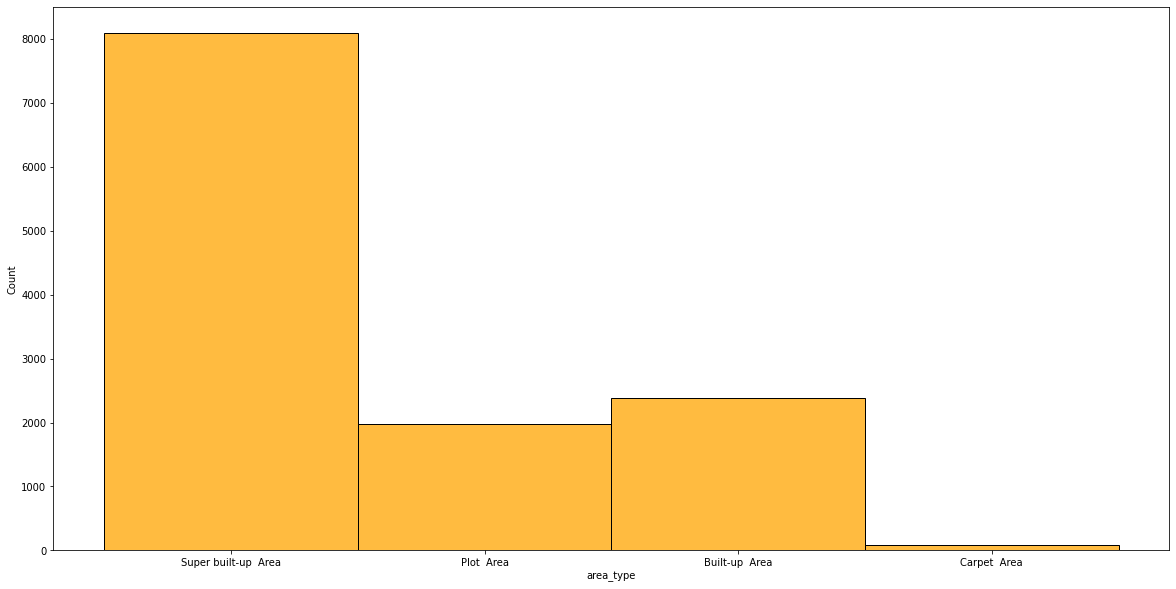

In [60]:
sns.histplot(df4.area_type, color = "orange")
plt.show()

In [61]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12535 entries, 0 to 12534
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       12535 non-null  object 
 1   location        12535 non-null  object 
 2   total_sqft      12535 non-null  float64
 3   bath            12535 non-null  float64
 4   balcony         12535 non-null  float64
 5   price           12535 non-null  float64
 6   Bedrooms        12535 non-null  int64  
 7   price_per_sqft  12535 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 783.6+ KB


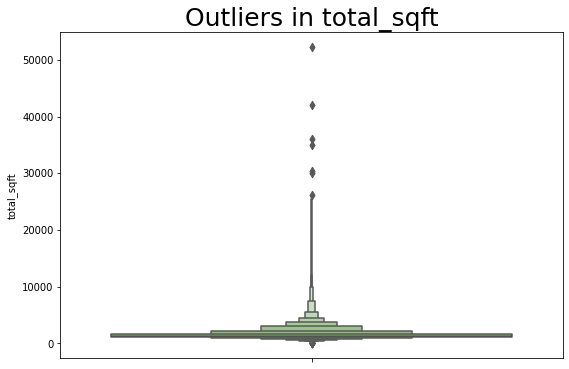

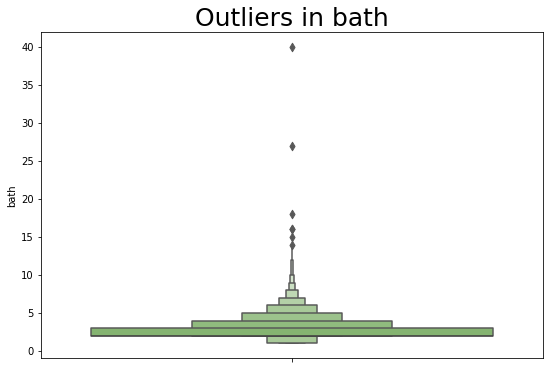

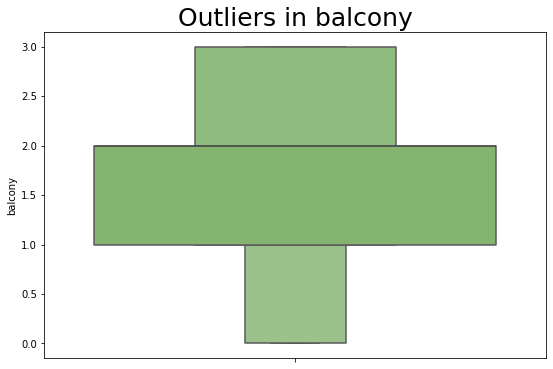

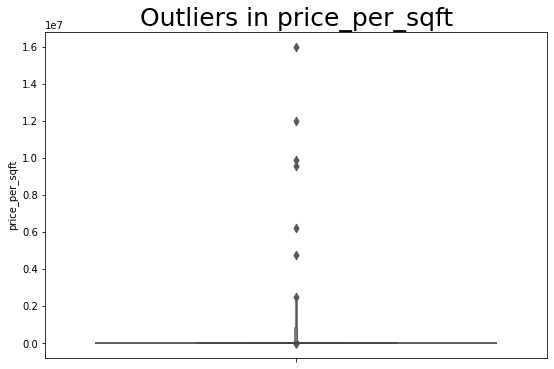

In [62]:
for col in ["total_sqft", "bath", "balcony", "price_per_sqft"]:
    plt.figure(figsize=(9,6));
    sns.boxenplot(y=col,data=df4,palette='summer');
    plt.title(f'Outliers in {col}',fontsize=25,fontweight=5);
    plt.show()

House with size less than 100 and more than 5000 square feet is impractical. Thus, such outliers will be removed.

In [63]:
df4 = df4[(df4["total_sqft"] >= 100) | (df4["total_sqft"] <= 5000)]

Houses with more than 10 bathrooms are acting as outliers.

In [64]:
print(np.where(df4["bath"]<10))

(array([    0,     1,     2, ..., 12532, 12533, 12534]),)


In [65]:
df4 = df4[(df4["bath"] <= 10)]

In [66]:
print(np.where((df4["price_per_sqft"]<1000) | (df4['price_per_sqft']>50000)))

(array([  340,   401,   660,   793,   994,   995,  1060,  1095,  1696,
        1841,  2244,  3177,  3947,  4147,  4795,  5198,  5253,  5331,
        5419,  5453,  5491,  5733,  5739,  6045,  6073,  6153,  6275,
        6653,  6781,  6933,  7017,  7273,  7320,  7386,  7536,  7599,
        7896,  8009,  8775,  8944,  9042,  9936, 10694, 10909, 10958,
       11082, 11545, 11722, 11747, 11828]),)


Houses with price more than 50,000 per square feet are acting as outliers.

In [67]:
df4 = df4[(df4["price_per_sqft"]>=1000) | (df4['price_per_sqft']<=50000)]

In [68]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12515 entries, 0 to 12534
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       12515 non-null  object 
 1   location        12515 non-null  object 
 2   total_sqft      12515 non-null  float64
 3   bath            12515 non-null  float64
 4   balcony         12515 non-null  float64
 5   price           12515 non-null  float64
 6   Bedrooms        12515 non-null  int64  
 7   price_per_sqft  12515 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 880.0+ KB


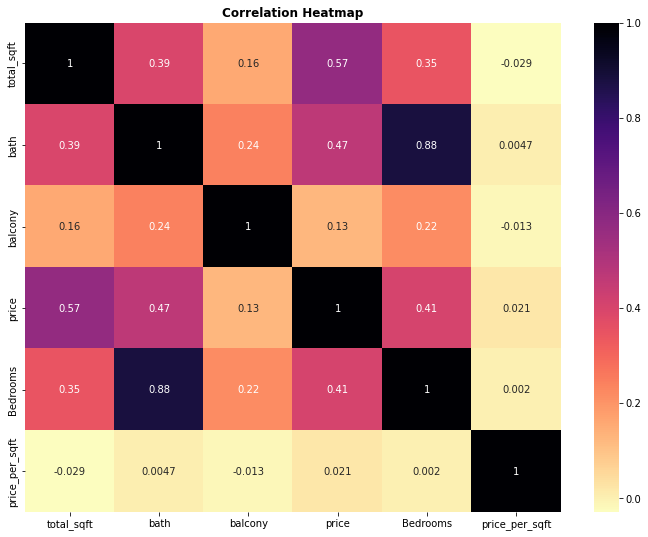

In [70]:
plt.figure(figsize = (12,9))
sns.heatmap(df4.corr(), annot = True, cmap = "magma_r")
plt.title("Correlation Heatmap",fontdict = {"fontweight":"bold"})
plt.show()

### Handling "location" column

In [71]:
df4['location'].nunique()

1296

we cant give these many column for one hot encode will cost high computation

In [72]:
def name_correction(x):
    x = x.lower() # all letters lower case
    x = x.replace('  ', ' ') # replace double spaces with single spaces
    x = x.strip() # remove leading and trailing white space
    return x

In [74]:
df5 = df4.copy()
df5["location"] = df5["location"].apply(lambda x: name_correction(x))

In [75]:
df5['location'].nunique()

1273

In [76]:
locations= df5['location'].value_counts(ascending=False)
locations

whitefield                        505
sarjapur road                     366
electronic city                   287
kanakpura road                    231
thanisandra                       221
                                 ... 
old town                            1
vasantapura main road               1
bapuji layout                       1
1st stage radha krishna layout      1
abshot layout                       1
Name: location, Length: 1273, dtype: int64

Label Encoding

In [77]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12515 entries, 0 to 12534
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       12515 non-null  object 
 1   location        12515 non-null  object 
 2   total_sqft      12515 non-null  float64
 3   bath            12515 non-null  float64
 4   balcony         12515 non-null  float64
 5   price           12515 non-null  float64
 6   Bedrooms        12515 non-null  int64  
 7   price_per_sqft  12515 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 880.0+ KB


In [78]:
from sklearn.preprocessing import LabelEncoder

In [79]:
encoder = LabelEncoder()
df5['area_type'] = encoder.fit_transform(df5['area_type'])
df5['location'] = encoder.fit_transform(df5['location'])
df5['Bedrooms'] = encoder.fit_transform(df5['Bedrooms'])

### Handling "bath" column

In [80]:
df5.shape

(12515, 8)

In [81]:
df5.bath.value_counts()

2.0     6464
3.0     3154
4.0     1185
1.0      722
5.0      510
6.0      260
7.0      101
8.0       64
9.0       42
10.0      13
Name: bath, dtype: int64

Text(0, 0.5, 'Count')

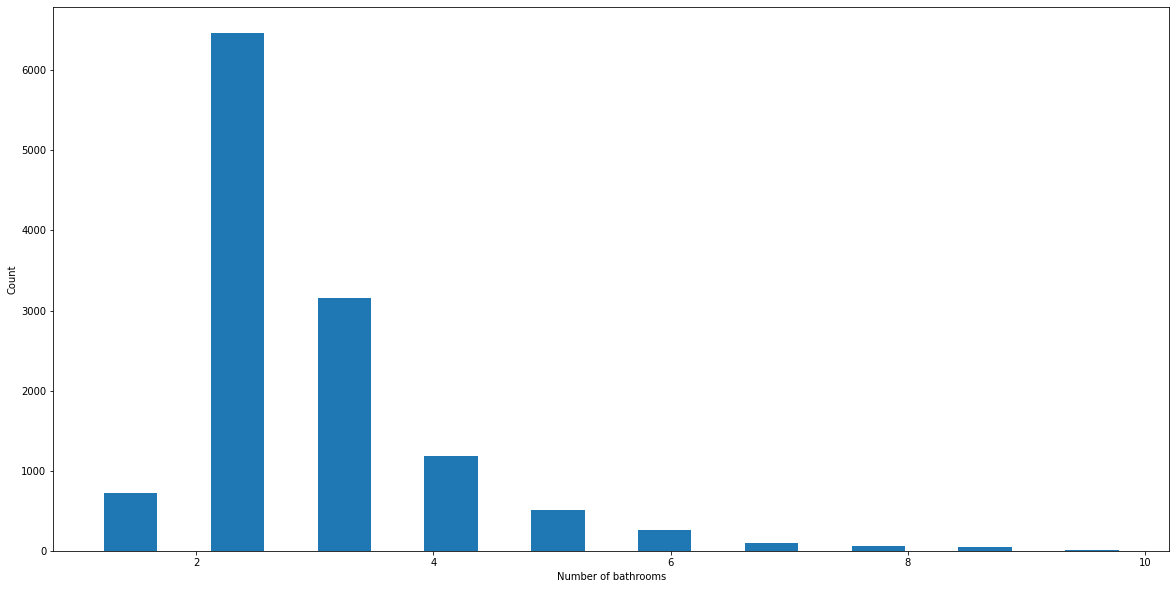

In [82]:
plt.hist(df5.bath,rwidth=0.5)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

It seems logical that the number of bathrooms in a house would be at most 1 more than the number of bedrooms (one bathroom in each bedroom and a maximum of  bathroom for guests):

In [83]:
df6= df5[df5.bath<(df5.Bedrooms+2)]
df6.shape

(11662, 8)

In [84]:
df6.bath.value_counts()

2.0     6424
3.0     3093
4.0      894
1.0      722
5.0      222
6.0      154
7.0       70
8.0       47
9.0       30
10.0       6
Name: bath, dtype: int64

In [85]:
df6.head()

,area_type,location,total_sqft,bath,balcony,price,Bedrooms,price_per_sqft
0,3,405,1056.0,2.0,1.0,39.07,1,3699.810606
2,0,1179,1440.0,2.0,3.0,62.00,2,4305.555556
3,3,744,1521.0,3.0,1.0,95.00,2,6245.890861
4,3,697,1200.0,2.0,1.0,51.00,1,4250.000000
5,3,1254,1170.0,2.0,1.0,38.00,1,3247.863248


# Corelation of Price with different features

In [86]:
import seaborn as sns

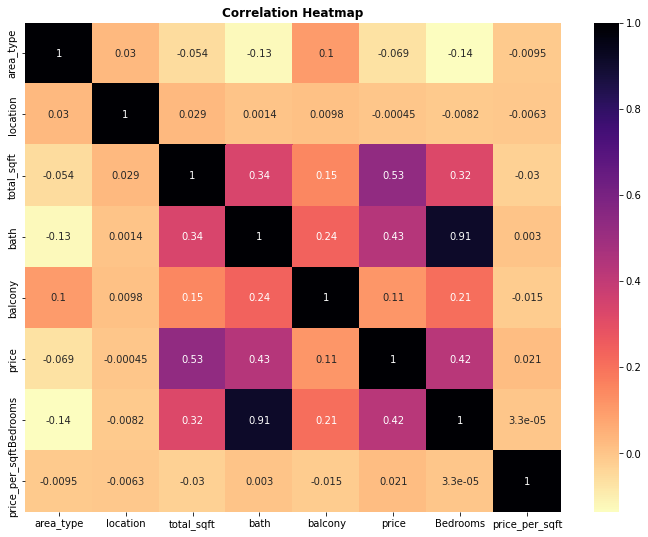

In [87]:
plt.figure(figsize = (12,9))
sns.heatmap(df6.corr(), annot = True, cmap = "magma_r")
plt.title("Correlation Heatmap",fontdict = {"fontweight":"bold"})
plt.show()

### Handling "square ft per bedroom"

Real estate experts say that a master bedroom averages 300 square meters, while the other bedrooms average 210 square meters each.

source:
https://www.thebalancemoney.com/how-much-square-footage-do-you-need-5201264#:~:text=A%20master%20bedroom%20averages%20about,about%20210%20square%20feet%20each.

Let's drop the ones with a square ft per bedroom 255 ---- ((300+210)/2) and below:

In [88]:
df7 = df6[~(df6.total_sqft/df6.Bedrooms<255)]
df7.shape

(11283, 8)

## Handling Outliers

In [89]:
df7.price_per_sqft.describe()

count    1.128300e+04
mean     8.405645e+03
std      1.209004e+05
min      2.678298e+02
25%      4.210526e+03
50%      5.285714e+03
75%      6.867465e+03
max      9.920635e+06
Name: price_per_sqft, dtype: float64

In [90]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11283 entries, 0 to 12534
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       11283 non-null  int64  
 1   location        11283 non-null  int64  
 2   total_sqft      11283 non-null  float64
 3   bath            11283 non-null  float64
 4   balcony         11283 non-null  float64
 5   price           11283 non-null  float64
 6   Bedrooms        11283 non-null  int64  
 7   price_per_sqft  11283 non-null  float64
dtypes: float64(5), int64(3)
memory usage: 793.3 KB


In [91]:
Numerical=df7.select_dtypes(exclude='object').columns.tolist()
Numerical

['area_type',
 'location',
 'total_sqft',
 'bath',
 'balcony',
 'price',
 'Bedrooms',
 'price_per_sqft']

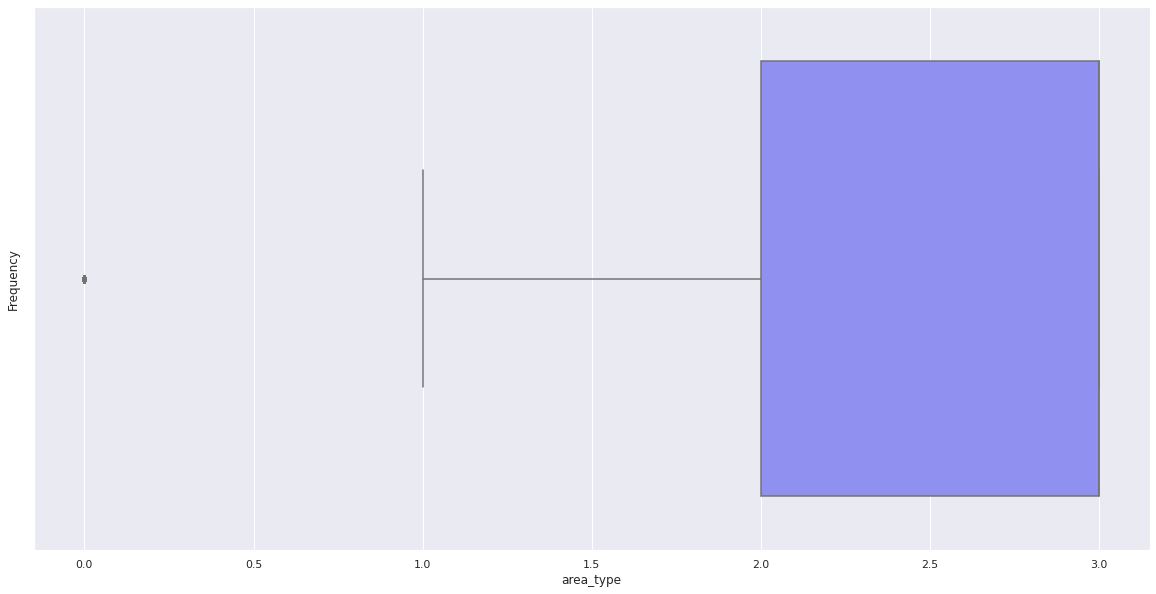

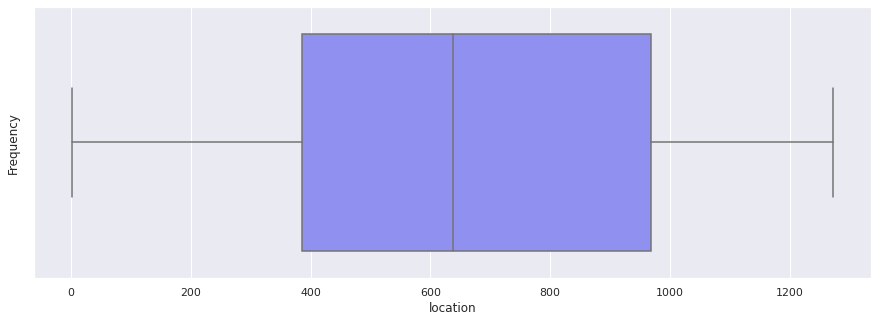

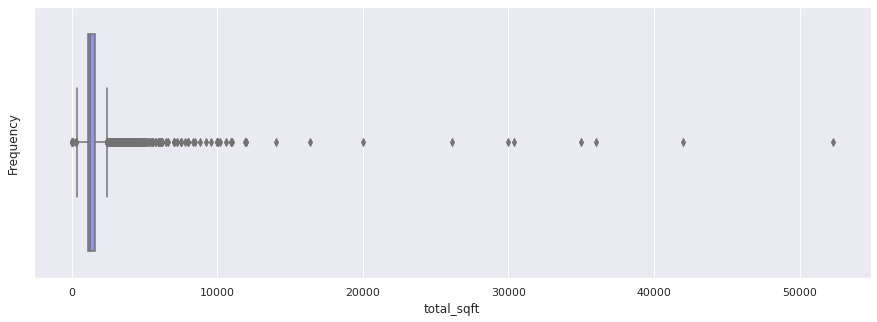

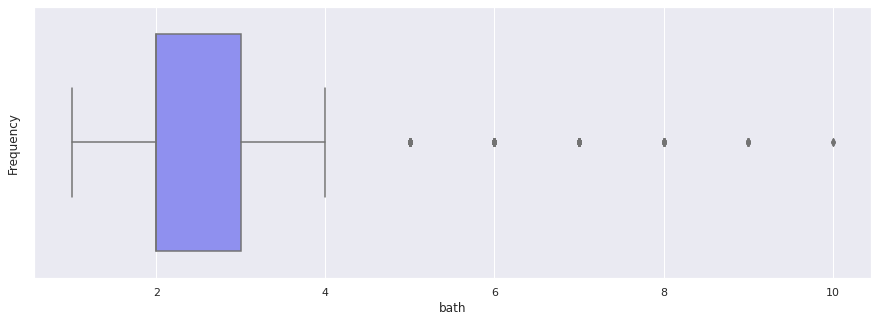

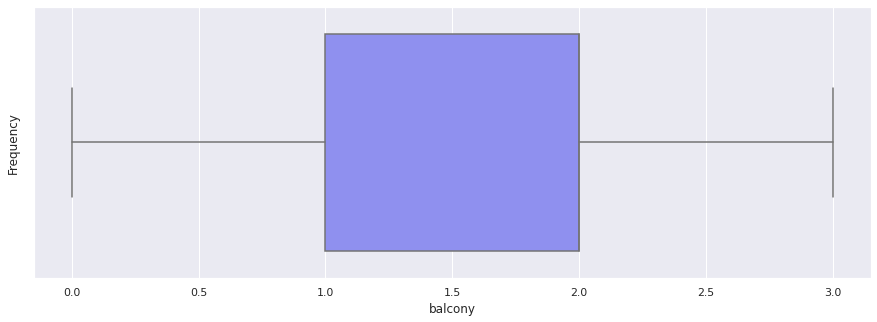

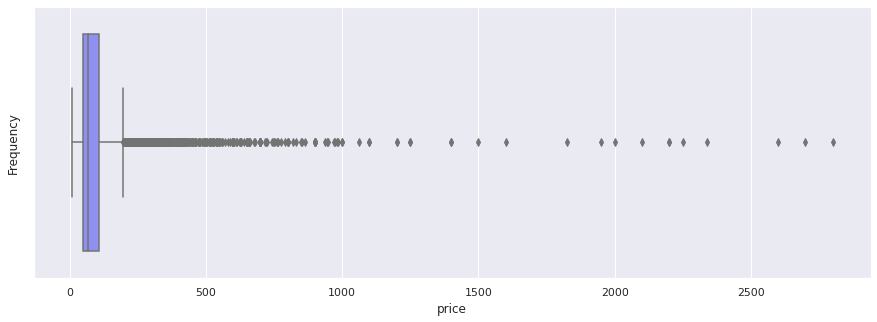

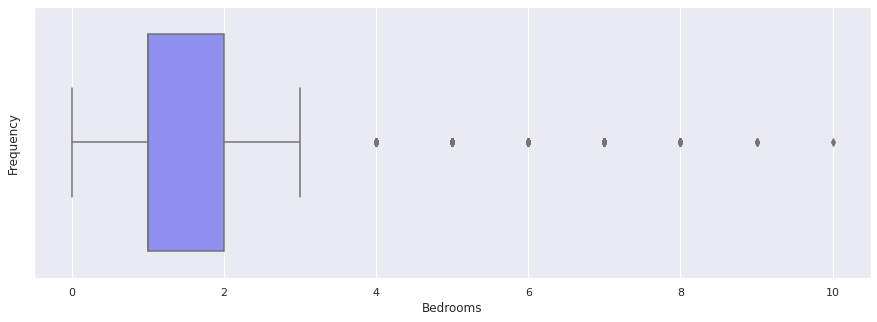

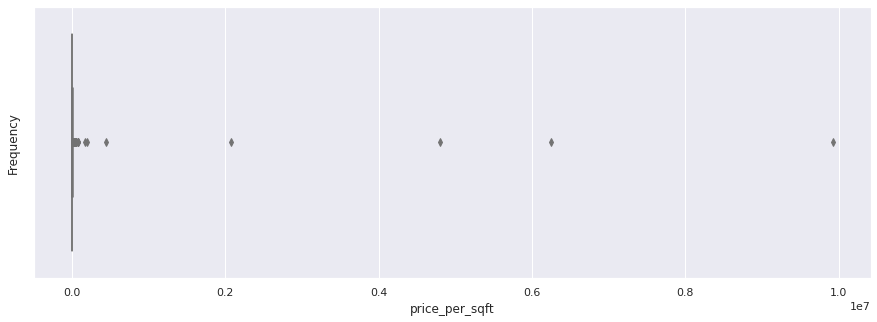

In [92]:
for i in Numerical:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(15, 5)})
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df7[i], palette='cool_r');

In [93]:
df8=df7.copy()

In [94]:
number_of_outliers=[None]*len(Numerical)
q75=[None]*len(Numerical)
q25=[None]*len(Numerical)
IQR=[None]*len(Numerical)
unique_values=[None]*len(Numerical)
ratio=[None]*len(Numerical)

for i, p in enumerate(Numerical):
    q75[i], q25[i]= np.percentile(df8[p],[75,25])
    IQR[i]= q75[i]- q25[i]
    number_of_outliers[i]=len((np.where((df8[p] > (q75[i] + 1.5 * IQR[i])) | (df8[p]< (q25[i] - 1.5 * IQR[i])))[0]))
    unique_values[i]= len(df8[p].unique())
    ratio[i]= number_of_outliers[i]/unique_values[i]
    
    print('outliers of',p," =", number_of_outliers[i])
    print('unique_values',p," =", unique_values[i])
    print('ratio',p," =", ratio[i])
    print("*"*45)

outliers of area_type  = 2226
unique_values area_type  = 4
ratio area_type  = 556.5
*********************************************
outliers of location  = 0
unique_values location  = 1185
ratio location  = 0.0
*********************************************
outliers of total_sqft  = 876
unique_values total_sqft  = 1709
ratio total_sqft  = 0.5125804564072557
*********************************************
outliers of bath  = 315
unique_values bath  = 10
ratio bath  = 31.5
*********************************************
outliers of balcony  = 0
unique_values balcony  = 4
ratio balcony  = 0.0
*********************************************
outliers of price  = 1057
unique_values price  = 1785
ratio price  = 0.592156862745098
*********************************************
outliers of Bedrooms  = 440
unique_values Bedrooms  = 11
ratio Bedrooms  = 40.0
*********************************************
outliers of price_per_sqft  = 945
unique_values price_per_sqft  = 6869
ratio price_per_sqft  = 0.13757461

In [95]:
#Find the outliers records which fall with +/- 25% boundaries 

Q1 = df8.quantile(0.25)
Q3 = df8.quantile(0.75)
IQR = Q3 - Q1

print("Number of outliers for entire dataset = ", len(df8[((df8 < (Q1 - 1.5 * IQR)) | (df8 > (Q3 + 1.5 * IQR))).any(axis=1)]))

Number of outliers for entire dataset =  3545


We can drop these outliers:

In [96]:
outliers_index= df8[((df8 < (Q1 - 1.5 * IQR)) |(df8 > (Q3 + 1.5 * IQR))).any(axis=1)].index
outliers_index

Int64Index([    2,     6,     7,    13,    20,    27,    33,    38,    39,
               47,
            ...
            12500, 12501, 12509, 12515, 12523, 12525, 12526, 12531, 12533,
            12534],
           dtype='int64', length=3545)

In [97]:
df8.iloc[62]

area_type            3.00000
location           486.00000
total_sqft        1240.00000
bath                 2.00000
balcony              1.00000
price               70.00000
Bedrooms             1.00000
price_per_sqft    5645.16129
Name: 71, dtype: float64

In [98]:
df8.shape

(11283, 8)

In [99]:
df9= pd.DataFrame(df8.drop(outliers_index.to_list(), axis=0))
df9

,area_type,location,total_sqft,bath,balcony,price,Bedrooms,price_per_sqft
0,3,405,1056.0,2.0,1.0,39.07,1,3699.810606
3,3,744,1521.0,3.0,1.0,95.00,2,6245.890861
4,3,697,1200.0,2.0,1.0,51.00,1,4250.000000
5,3,1254,1170.0,2.0,1.0,38.00,1,3247.863248
8,3,783,1310.0,3.0,1.0,63.25,2,4828.244275
...,...,...,...,...,...,...,...,...
12522,3,951,1187.0,2.0,2.0,40.14,1,3381.634372
12527,3,1270,1675.0,3.0,2.0,92.13,2,5500.298507
12528,3,943,1050.0,2.0,2.0,52.71,1,5020.000000
12529,3,210,1262.0,2.0,2.0,47.00,1,3724.247227


In [100]:
df8.shape

(11283, 8)

dropped 1810 outlier rows:

In [101]:
df9.shape

(7738, 8)

In [102]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7738 entries, 0 to 12530
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       7738 non-null   int64  
 1   location        7738 non-null   int64  
 2   total_sqft      7738 non-null   float64
 3   bath            7738 non-null   float64
 4   balcony         7738 non-null   float64
 5   price           7738 non-null   float64
 6   Bedrooms        7738 non-null   int64  
 7   price_per_sqft  7738 non-null   float64
dtypes: float64(5), int64(3)
memory usage: 544.1 KB


In [103]:
def plot_scatter(df,location):
  bhk2=df[(df.location==location)&(df.Bedrooms==2)]
  bhk3=df[(df.location==location)&(df.Bedrooms==3)]
  plt.scatter(bhk2.total_sqft,bhk2.price_per_sqft,color="blue",label="2 BHK",s=50)
  plt.scatter(bhk3.total_sqft,bhk3.price_per_sqft,color="green",label="3 BHK",s=100)
  plt.xlabel("Total Square Feet Area")
  plt.ylabel("Price Per Square Feet")
  plt.title(location)
  plt.legend()

In [104]:
df9.location.value_counts().head(30)

1254    329
1030    245
403     207
641     201
1147    173
1264    143
951     132
783     123
1179    114
503     113
184     102
51       91
494      85
486      75
405      74
210      70
406      67
284      63
512      62
204      61
1188     60
518      59
489      58
647      57
1270     56
565      52
517      52
697      50
161      49
1028     49
Name: location, dtype: int64

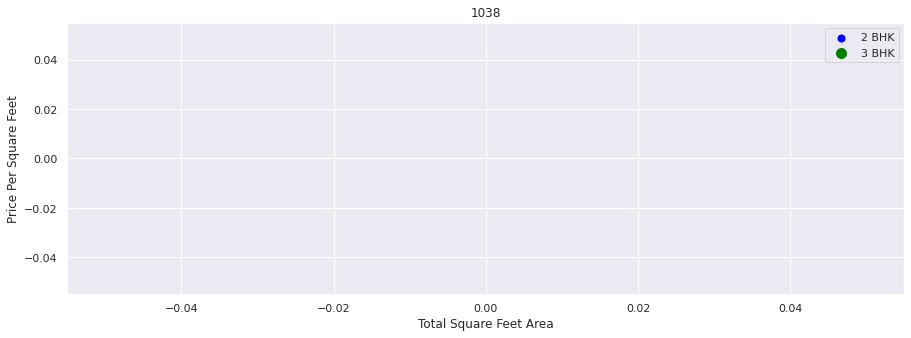

In [105]:
plot_scatter(df9,1038)

It can be noted 3BHK and 2BHK prices overlaps in same location for similar sqr feet area



In [106]:
def remove_bhk_outlier(df):
  outlier_index=np.array([])
  for location,location_df in df.groupby("location"):
    bhk_stats={}
    for bhk,bhk_df in location_df.groupby("Bedrooms"):
      bhk_stats[bhk]={
          "Mean":np.mean(bhk_df.price_per_sqft),
          "STD":np.std(bhk_df.price_per_sqft),
          "count":bhk_df.shape[0]
      }
    for bhk,bhk_df in location_df.groupby("Bedrooms"):
      stats=bhk_stats.get(bhk-1)
      if stats and stats["count"]>5:
         outlier_index=np.append(outlier_index,bhk_df[bhk_df.price_per_sqft<(stats["Mean"])].index.values)  
  return df.drop(outlier_index,axis=0)

In [107]:
df9.shape

(7738, 8)

In [108]:
df10= remove_bhk_outlier(df9)
df10.shape

(6276, 8)

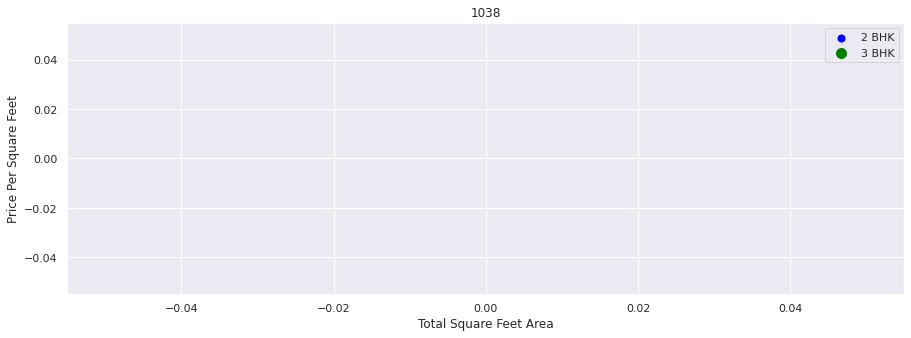

In [109]:
plot_scatter(df10,1038)

We have removed outlier whos Total square feet and price per ratio overlap to large extent

Text(0, 0.5, 'Count')

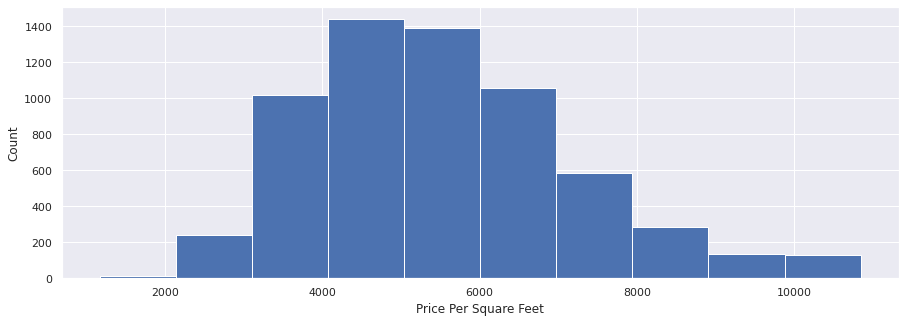

In [110]:
plt.hist(df10.price_per_sqft)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

Normal distribution(less outlier)

In [111]:
df10 = df10.drop(['price_per_sqft'], axis='columns')
df10.head()

,area_type,location,total_sqft,bath,balcony,price,Bedrooms
0,3,405,1056.0,2.0,1.0,39.07,1
3,3,744,1521.0,3.0,1.0,95.00,2
4,3,697,1200.0,2.0,1.0,51.00,1
12,3,51,1000.0,2.0,1.0,38.00,1
14,2,1028,2250.0,3.0,2.0,148.00,2


In [112]:
dummy= pd.get_dummies(df10.location,drop_first=True)
dummy.head()

,5,6,7,8,9,11,14,16,19,21,...,1259,1261,1263,1264,1265,1267,1268,1270,1271,1272
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [113]:
df11 = pd.concat([df10, dummy], axis=1)
df11.head()

,area_type,location,total_sqft,bath,balcony,price,Bedrooms,5,6,7,...,1259,1261,1263,1264,1265,1267,1268,1270,1271,1272
0,3,405,1056.0,2.0,1.0,39.07,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,744,1521.0,3.0,1.0,95.00,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,697,1200.0,2.0,1.0,51.00,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,3,51,1000.0,2.0,1.0,38.00,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,2,1028,2250.0,3.0,2.0,148.00,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [114]:
df12 = df11.drop('location', axis='columns')
df12.head()

,area_type,total_sqft,bath,balcony,price,Bedrooms,5,6,7,8,...,1259,1261,1263,1264,1265,1267,1268,1270,1271,1272
0,3,1056.0,2.0,1.0,39.07,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1521.0,3.0,1.0,95.00,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,1200.0,2.0,1.0,51.00,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,3,1000.0,2.0,1.0,38.00,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,2,2250.0,3.0,2.0,148.00,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [115]:
df12.shape

(6276, 904)

# Splitting the Dataset

In [116]:
X= df12.drop(["price"], axis=1)
y= df12.price

In [117]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [118]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4393, 903), (1883, 903), (4393,), (1883,))

In [119]:
X_train

,area_type,total_sqft,bath,balcony,Bedrooms,5,6,7,8,9,...,1259,1261,1263,1264,1265,1267,1268,1270,1271,1272
2726,2,1550.0,2.0,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3486,2,1350.0,2.0,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8964,3,1303.0,2.0,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11080,3,1170.0,2.0,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9926,3,920.0,2.0,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7445,3,1200.0,2.0,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10296,3,980.0,2.0,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10357,3,1335.0,2.0,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10714,3,1588.0,2.0,3.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [120]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [121]:
# pipe = Pipeline(steps=[
#              ("scaler", StandardScaler()),
#              ("imputer", SimpleImputer()),
#              ])

In [122]:
# X_train= pipe.fit_transform(X_train)
# X_test= pipe.transform(X_test)

# Model Building

In [123]:
from time import time

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [124]:
models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    KNeighborsRegressor(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor()
]

In [125]:
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score

In [126]:
%%time
for model in models:
    start = time()
    model.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    y_pred = model.predict(X_test)
    predict_time = time()-start    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", explained_variance_score(y_test, y_pred))
    print("\tMean absolute error:", mean_absolute_error(y_test, y_pred))
    print("\tR2 score:", r2_score(y_test, y_pred))
    print()

LinearRegression()
	Training time: 0.769s
	Prediction time: 0.017s
	Explained variance: -877538495158686.0
	Mean absolute error: 60892472.98358358
	R2 score: -877568694356169.2

Ridge()
	Training time: 0.218s
	Prediction time: 0.030s
	Explained variance: 0.7523139818157323
	Mean absolute error: 12.483559556570546
	R2 score: 0.7522362644834795

Lasso()
	Training time: 0.122s
	Prediction time: 0.017s
	Explained variance: 0.6501156757637512
	Mean absolute error: 15.741227753060237
	R2 score: 0.6498126672348089

KNeighborsRegressor()
	Training time: 0.026s
	Prediction time: 0.638s
	Explained variance: 0.6556377210867623
	Mean absolute error: 14.784841210833775
	R2 score: 0.6554210600817874

DecisionTreeRegressor()
	Training time: 0.196s
	Prediction time: 0.013s
	Explained variance: 0.6472207521786337
	Mean absolute error: 13.52545840776324
	R2 score: 0.6464995737571695

RandomForestRegressor()
	Training time: 9.394s
	Prediction time: 0.103s
	Explained variance: 0.750951676504423
	Mean abso

The best R^2 estimate we got is from Linear RidgeRegressor. The estimation value is 0.787 with prediction time of 0.002s.

# It seems like I have lost many useful value due to outlier reduction. so I will try using df without outlier reduction

In [127]:
encoder = LabelEncoder()
df4['area_type'] = encoder.fit_transform(df4['area_type'])
df4['location'] = encoder.fit_transform(df4['location'])


In [128]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12515 entries, 0 to 12534
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       12515 non-null  int64  
 1   location        12515 non-null  int64  
 2   total_sqft      12515 non-null  float64
 3   bath            12515 non-null  float64
 4   balcony         12515 non-null  float64
 5   price           12515 non-null  float64
 6   Bedrooms        12515 non-null  int64  
 7   price_per_sqft  12515 non-null  float64
dtypes: float64(5), int64(3)
memory usage: 880.0 KB


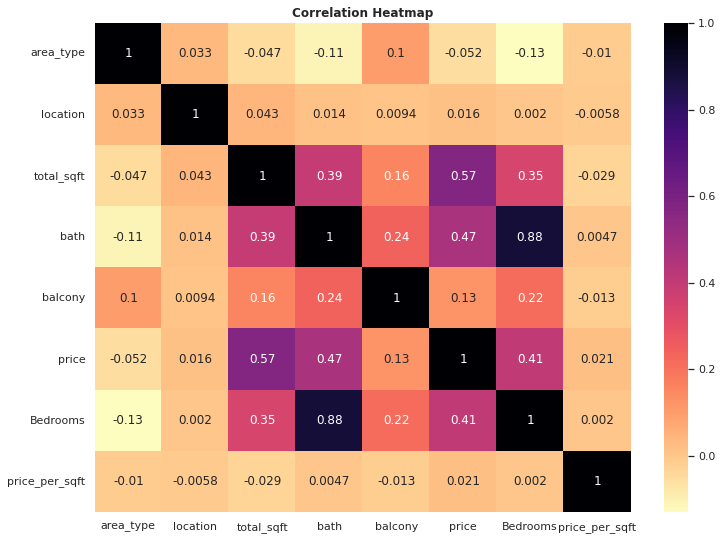

In [129]:
plt.figure(figsize = (12,9))
sns.heatmap(df4.corr(), annot = True, cmap = "magma_r")
plt.title("Correlation Heatmap",fontdict = {"fontweight":"bold"})
plt.show()

area type and location has very less correlation

In [130]:
X=df4.drop(["price","price_per_sqft","area_type","location"],axis=1)
y=df4["price"]

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [133]:
# X_train= pipe.fit_transform(X_train)
# X_test= pipe.transform(X_test)

In [134]:
%%time
for model in models:
    start = time()
    model.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    y_pred = model.predict(X_test)
    predict_time = time()-start    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", explained_variance_score(y_test, y_pred))
    print("\tMean absolute error:", mean_absolute_error(y_test, y_pred))
    print("\tR2 score:", r2_score(y_test, y_pred))
    print()

LinearRegression()
	Training time: 0.004s
	Prediction time: 0.004s
	Explained variance: 0.4388262712298061
	Mean absolute error: 49.47051173234678
	R2 score: 0.4383902765921289

Ridge()
	Training time: 0.002s
	Prediction time: 0.001s
	Explained variance: 0.43882637341960107
	Mean absolute error: 49.46992353952311
	R2 score: 0.4383903613978155

Lasso()
	Training time: 0.002s
	Prediction time: 0.004s
	Explained variance: 0.4389769307772228
	Mean absolute error: 49.47397554978594
	R2 score: 0.43853293738533494

KNeighborsRegressor()
	Training time: 0.007s
	Prediction time: 0.015s
	Explained variance: 0.5806861425492462
	Mean absolute error: 43.49452996005327
	R2 score: 0.5806291336600973

DecisionTreeRegressor()
	Training time: 0.017s
	Prediction time: 0.002s
	Explained variance: 0.20334029246453433
	Mean absolute error: 49.782693140749046
	R2 score: 0.2033134223794446

RandomForestRegressor()
	Training time: 0.872s
	Prediction time: 0.078s
	Explained variance: 0.5567586051793971
	Mean ab

# Cross Validation for RidgeRegressor model

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
models[5]

In [ ]:
for model in models:
  print(model)
  print((cross_val_score(model, X_train, y_train, cv=5)).mean())

# GridSearchCV for RandomForestRegressor model

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
%%time
RF_param_grid = { 
    'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)],
    'max_depth' : [int(x) for x in np.linspace(20, 100, num = 5)],
                 }
RF_GridCV = GridSearchCV(models[5], RF_param_grid, cv=5, n_jobs= -1)
RF_GridCV.fit(X_train,y_train)  
print(RF_GridCV.best_params_)    
print(RF_GridCV.best_score_)

In [ ]:
best_model=RF_GridCV.best_estimatore_

In [ ]:
best_model.fit(X_train,y_train)

In [ ]:
y_pred = best_model.predict(X_test)
print(r2_score(y_test,y_pred))

# Testing the Model

In [ ]:
def predict_price(location,sqft,bath,BHK):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = BHK
    if loc_index >= 0:
        x[loc_index] = 1

    return best_model.predict([x])[0]

In [ ]:
df12.loc[df12["1st Block Jayanagar"]==1]

In [ ]:
predict_price('1st Block Jayanagar', 1000, 3, 2)

In [ ]:
predict_price('1st Block Jayanagar', 1760, 3,2)

In [ ]:
df12.loc[df12["1st Phase JP Nagar"]==1]

# Export the tested model to a pickle file

In [ ]:
import pickle
with open('bangaluru_house_prices_RIFmodel.pickle','wb') as f:
    pickle.dump(Grid_Model_RF,f)

# Export location and column information to a file that will be useful later on in our prediction application

In [ ]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))